<a href="https://colab.research.google.com/github/ASTRONOE/RedWine-Analysis/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the composition and quality of red wine and an application, using EDA, PCA and t-SNE

In [64]:
#Import libraries
from google.colab import files, drive
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.metrics import pairwise_distances
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [65]:
#@title
#mount dataset
drive.mount('/content/gdrive', force_remount=True)
!cd gdrive/MyDrive/My_Datasets/Kaggle

Mounted at /content/gdrive


This is a dataset with uniformly numeric values. The features are composition of red wine that determine its quality rating which is what the wine consumer wants delivered from its producers.

In [66]:
#introduce the red wine dataset
df_wine = pd.read_csv("/content/gdrive/MyDrive/My_Datasets/Kaggle/red-wine.csv")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###The summary shows that 

* Wine with higher concentration of constituents are better in quality.
* Likewise wine with lower conconcentration of constituents are lower in quality.
* The distribution of the features is normal with little degree of skewing.

Note that I removed the density feature because it has its values ranging from 0.99 to 1.00 which makes it insignificant.

In [67]:
#Summany
df_wine = df_wine.drop(columns="density")
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


---

### Histogram to view the distribution of wine quality.

The quality of the wine is forms a normal distribution that is a little bit skewed to the right. It indicates that no one wants to produce poor quality wine as indicated in bin 3 and 4. However it is easy to manufacture common wine as indicated by bin 5 ans 6. But difficult to make high quality wine as shown by bin 7 and 8; 8 being the prize here.

---


Text(0, 0.5, 'Frequency')

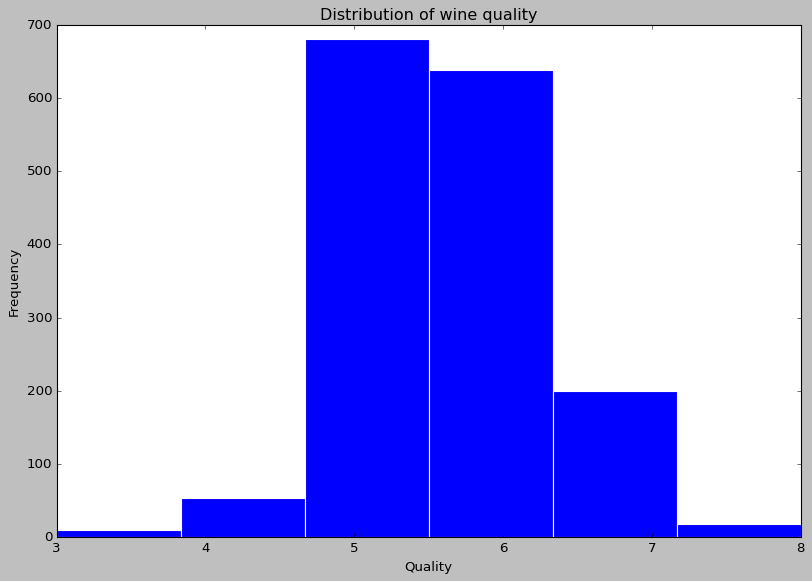

In [68]:
df_wine["quality"].plot.hist(bins=6, edgecolor="white", figsize=(12, 8));
plt.title("Distribution of wine quality")
plt.xlabel("Quality")
plt.ylabel("Frequency")

In [69]:
#The sorting of values from the bins
df_wine['quality'].value_counts().sort_values()

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

### Boxplot to show a the distribution and compositiom of wine

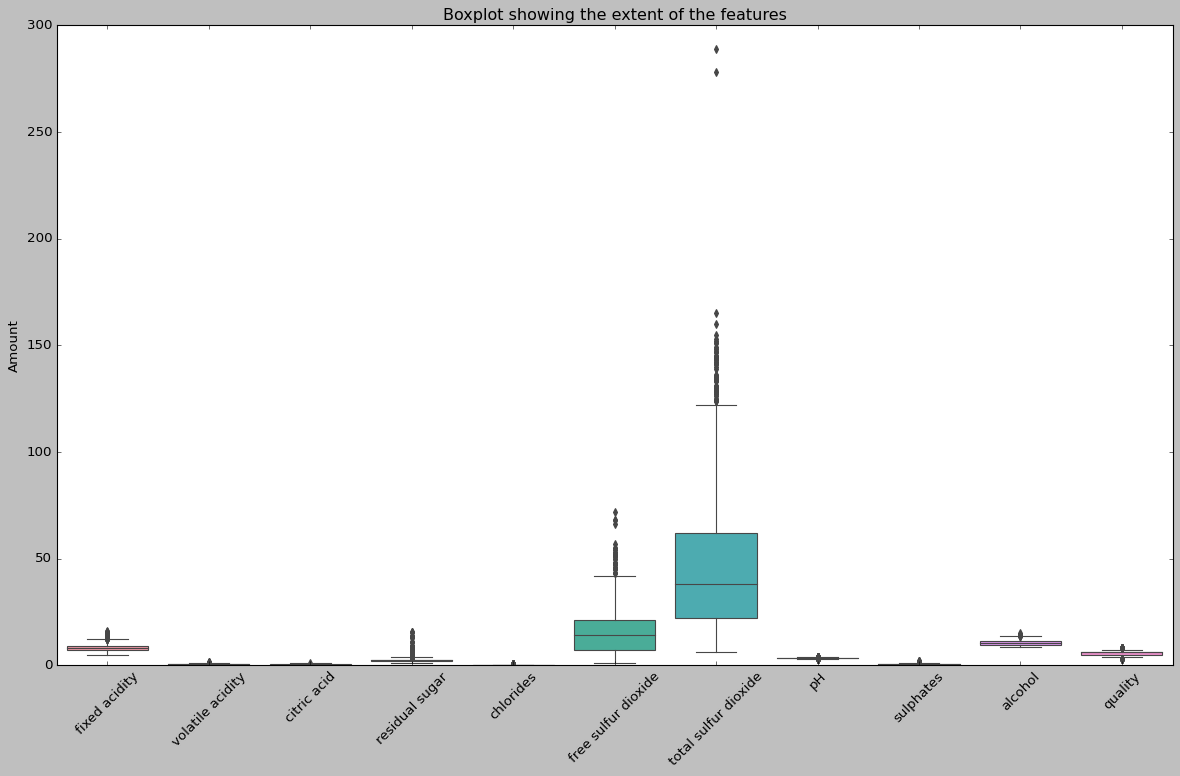

In [70]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data=df_wine[list(df_wine.columns)], ax=ax)

plt.title("Boxplot showing the extent of the features")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()

All the values in the features are in small amounts except the free and total sulphur dioxide that are in large amounts. The 'total sulphur dioxide' is so large that the outliers enlarge the chart.

I will need to remove the outlier but do the outliers make the wine the best quality?

In [71]:
df_qua8 = df_wine.query('quality == 8')
df_qua8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,3.46,0.74,12.7,8


No. The outliers are not found in the best wine quality. So they can be eliminated right away. We will use a scatter plot to draw the distribution of the two sulphur dioxide features to see the extent of the two outliers in the boxplot.

In [72]:
df_wine.reset_index(inplace=True) #set up index

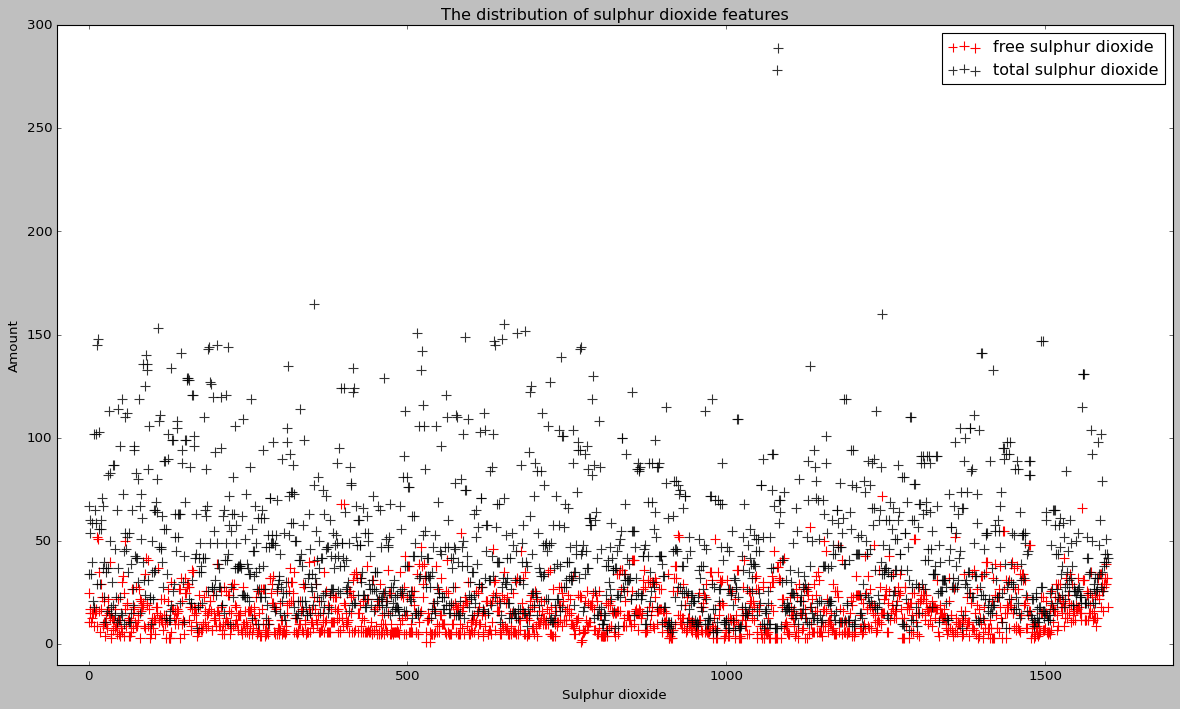

In [73]:
fig, ax = plt.subplots(figsize=(18, 10))

#draw both plots
plt.scatter(df_wine['index'], df_wine['free sulfur dioxide'], color="red", label='free sulphur dioxide', s=70, marker='+')
plt.scatter(df_wine['index'], df_wine['total sulfur dioxide'], color="black", alpha=0.8, label='total sulphur dioxide', s=70, marker='+')

plt.xlim(-50, 1700)
plt.ylim(-10, 300)
plt.title('The distribution of sulphur dioxide features')
plt.xlabel("Sulphur dioxide")
plt.ylabel("Amount")
plt.legend()
plt.show()

The outliers have been spotted. We will subtract them from the median of the y-axis and blend them into the scatterplots.
We do it this way because our dataset is not so large enough to satisfy further statistical analysis. It will be quite detrimental to delete the rows.

In [74]:
#location of the outliers
df_wine.loc[df_wine['total sulfur dioxide'] > 250, ['total sulfur dioxide']]

,total sulfur dioxide
1079,278.0
1081,289.0


In [75]:
#change the values
df_wine.replace(df_wine.at[1079, 'total sulfur dioxide'], 128.0, inplace=True) #subtracted by 150
df_wine.replace(df_wine.at[1081, 'total sulfur dioxide'], 139.0, inplace=True) #subtracted by 150
print(df_wine.at[1079, 'total sulfur dioxide']) 
print(df_wine.at[1081, 'total sulfur dioxide'])

128.0
139.0


### Correlation analysis
The next thing we will examine is the correlation of all the values in the dataset using a correlation matrix and a corresponding heatmap. Since the dataset consist purely of numeric or continuous variables, correlations are expected.

In [76]:
df_corr = df_wine.drop(columns='index').corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.115090,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.086191,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.024242,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.184987,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.053469,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.675132,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.115090,0.086191,0.024242,0.184987,0.053469,0.675132,1.000000,-0.056990,0.049343,-0.222042,-0.200459
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.056990,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.049343,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.222042,0.205633,0.093595,1.000000,0.476166


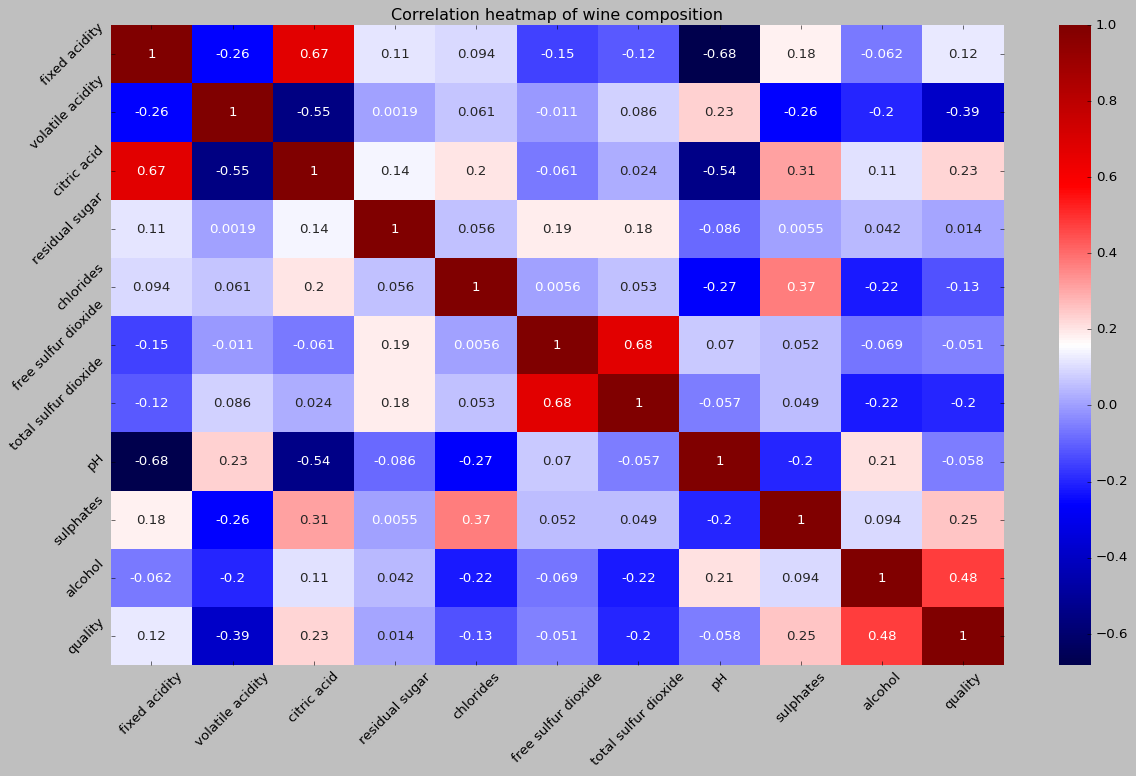

In [77]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_corr, cmap="seismic", annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation heatmap of wine composition")
plt.show()

It seems that some of the features exhibit mixed-up correlation coefficients with each other. But very significant amount of features still exhibit zero correlation with each other. Perhaps this could be due to the relatively small sample size of the dataset but there are few features that seem to show strong positive correlation with each other. Only "residual sugar" show no strong correlation with any of the other features.

Now let's see composition of wines having the best quality rating. For statistical reasons we cannot just pick oly wines with quality ratings 8 because there are just too few of them.

In [78]:
df_qua78 = df_wine.drop(columns='index').query('quality in [7, 8]').corr()
df_qua78

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.265124,0.745279,0.195400,0.213242,-0.158259,-0.220038,-0.771242,0.155840,-0.391694,-0.042254
volatile acidity,-0.265124,1.000000,-0.494798,0.089458,0.072973,0.017497,0.103700,0.342638,-0.208232,0.074566,0.037022
citric acid,0.745279,-0.494798,1.000000,0.277449,0.253127,-0.070361,-0.091860,-0.721072,0.185814,-0.106004,0.022656
residual sugar,0.195400,0.089458,0.277449,1.000000,0.129603,0.017601,0.105080,-0.181743,-0.125120,0.071758,-0.028967
chlorides,0.213242,0.072973,0.253127,0.129603,1.000000,-0.179641,-0.257987,-0.180250,0.129020,-0.210308,-0.079045
free sulfur dioxide,-0.158259,0.017497,-0.070361,0.017601,-0.179641,1.000000,0.761837,0.119722,0.017191,0.008409,-0.020729
total sulfur dioxide,-0.220038,0.103700,-0.091860,0.105080,-0.257987,0.761837,1.000000,0.171811,0.038931,0.140056,-0.000784
pH,-0.771242,0.342638,-0.721072,-0.181743,-0.180250,0.119722,0.171811,1.000000,-0.027010,0.349997,-0.042111
sulphates,0.155840,-0.208232,0.185814,-0.125120,0.129020,0.017191,0.038931,-0.027010,1.000000,-0.052293,0.054699
alcohol,-0.391694,0.074566,-0.106004,0.071758,-0.210308,0.008409,0.140056,0.349997,-0.052293,1.000000,0.174075


### Comparision of wines with best quality ratings 7 and 8 with the the general wine quality correlation

If we look at both charts, we don't see a lot 

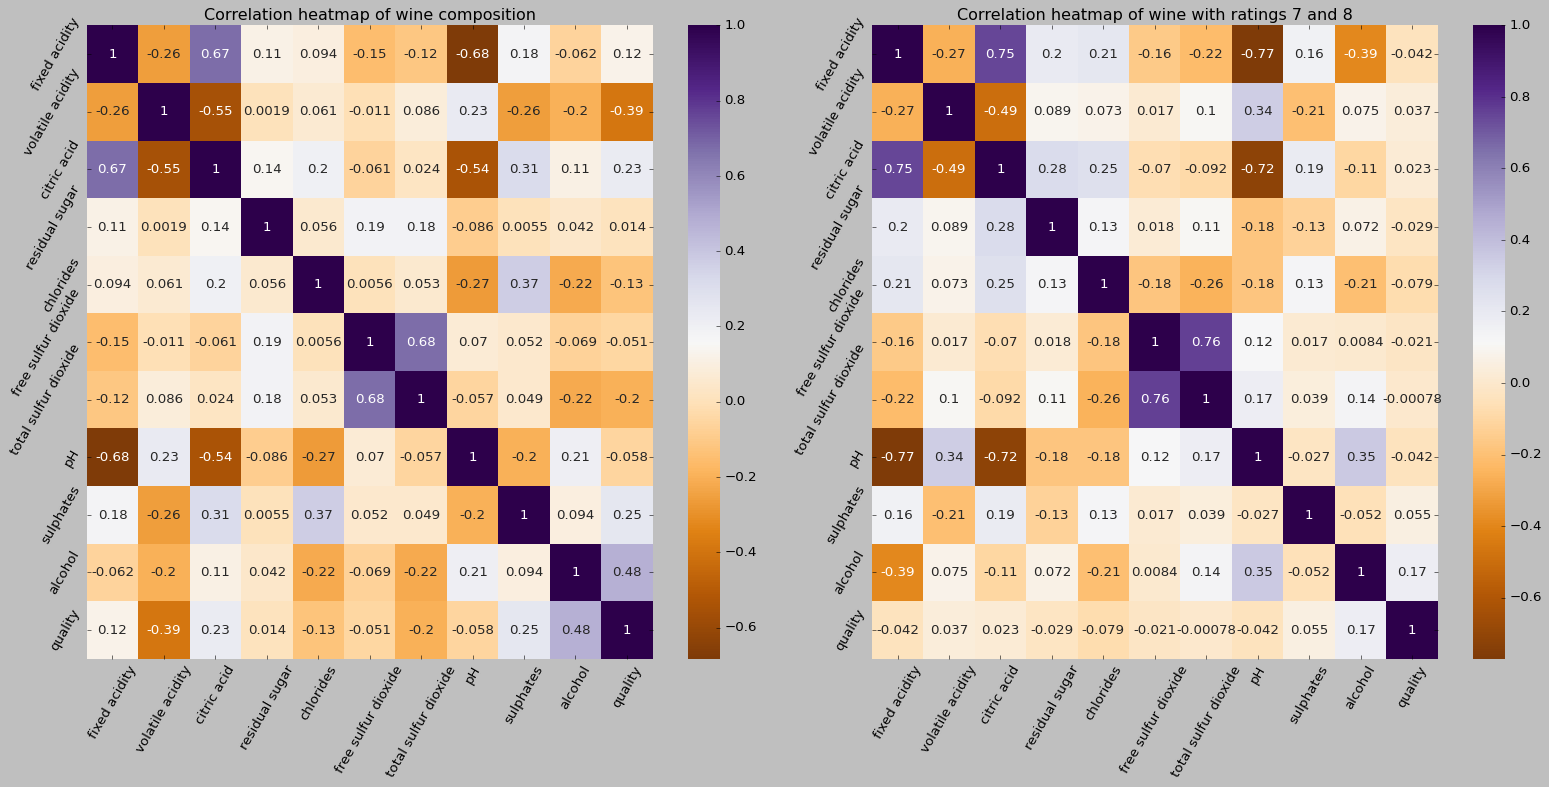

In [79]:
#get figure
fig, ax = plt.subplots(1, 2, figsize=(20, 10)) 
plt.draw()

#get correlation of all wine composition
sns.heatmap(df_corr, ax=ax[0], cmap="PuOr", annot=True)
ax[0].tick_params(axis='y', labelrotation=60)
ax[0].tick_params(axis='x', labelrotation=60)
ax[0].set_title("Correlation heatmap of wine composition")

#get composition of wine composition with quality 8 rating
sns.heatmap(df_qua78, ax=ax[1], cmap="PuOr", annot=True)
ax[1].tick_params(axis='y', labelrotation=60)
ax[1].tick_params(axis='x', labelrotation=60)
ax[1].set_title("Correlation heatmap of wine with ratings 7 and 8")

plt.tight_layout()
plt.show()

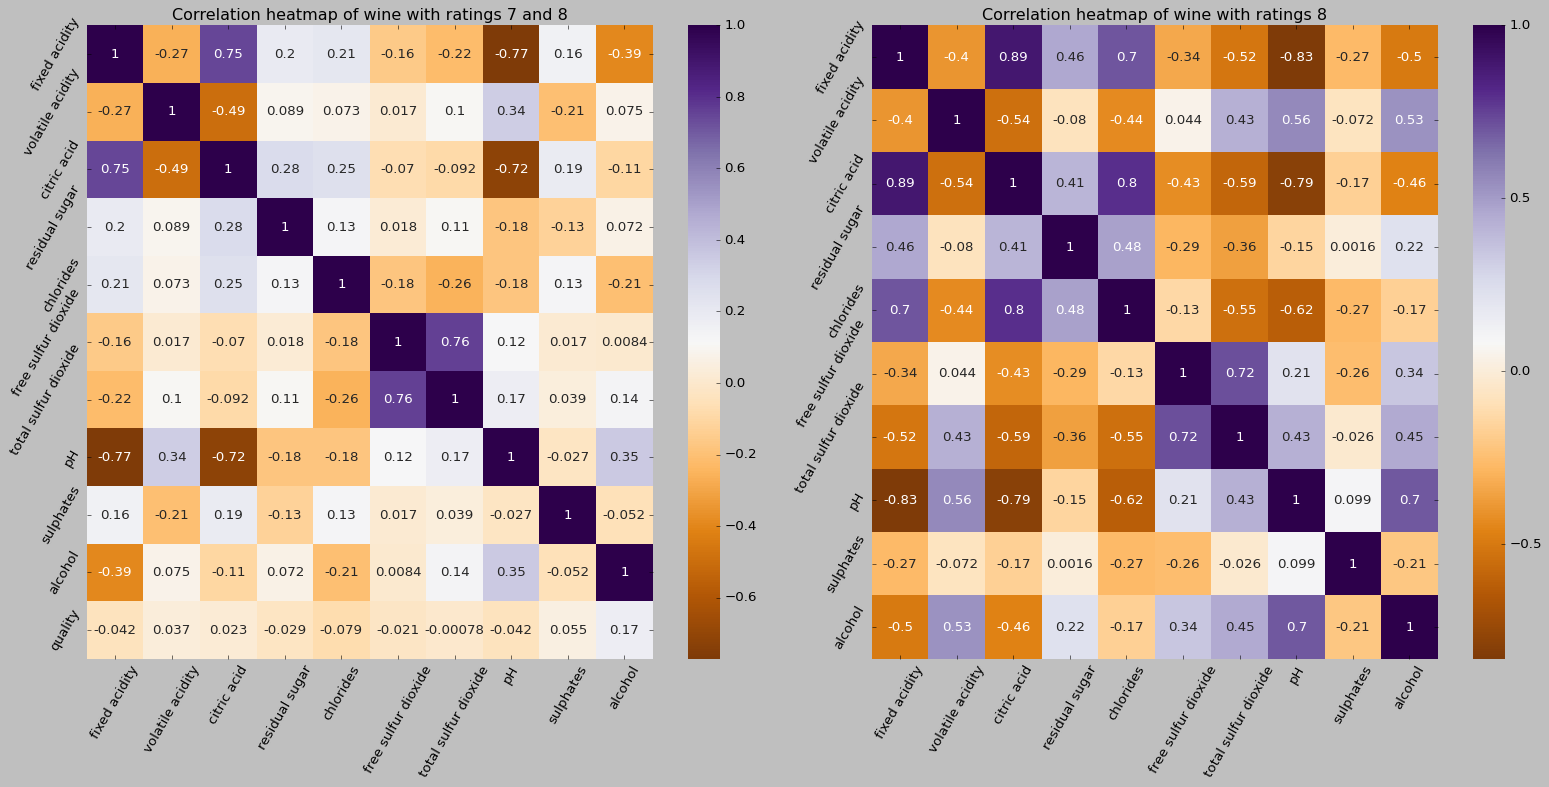

In [80]:
#get figure
fig, ax = plt.subplots(1, 2, figsize=(20, 10)) 
plt.draw()

#get correlation of all wine composition
sns.heatmap(df_qua78.drop(columns='quality'), ax=ax[0], cmap="PuOr", annot=True)
ax[0].tick_params(axis='y', labelrotation=60)
ax[0].tick_params(axis='x', labelrotation=60)
ax[0].set_title("Correlation heatmap of wine with ratings 7 and 8")

#get composition of wine composition with quality 8 rating
sns.heatmap(df_qua8.drop(columns='quality').corr(), ax=ax[1], cmap="PuOr", annot=True)
ax[1].tick_params(axis='y', labelrotation=60)
ax[1].tick_params(axis='x', labelrotation=60)
ax[1].set_title("Correlation heatmap of wine with ratings 8")

plt.tight_layout()
plt.show()

In [81]:
df_wine.quality.isin([7, 8])

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality, Length: 1599, dtype: bool

Let us add a new column where we generalize the wine quality into just three ratings where it indicates

1.   poor wine
2.   moderate or averge wine
3. best wine



In [82]:
def Qua_wrangle(x): #get quality valiues

  if x in [7, 8]: #best wine
    return 3
  elif x in [5, 6]: #average wine
    return 2
  elif x in [3, 4]: #poor wine
    return 1
  else:
    raise ValueError("Invalid rating")

df_wine['quality rating'] = df_wine['quality'].apply(Qua_wrangle)

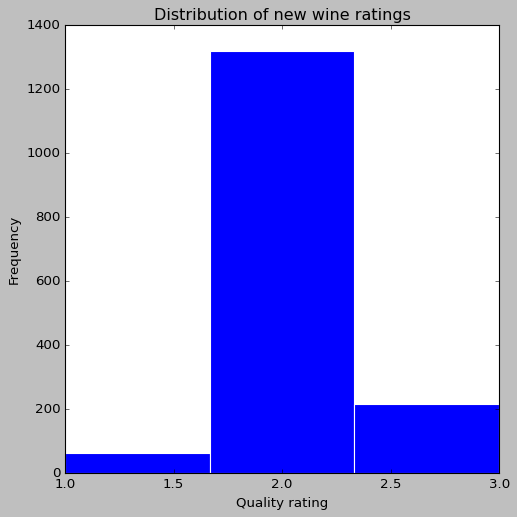

In [83]:
df_wine["quality rating"].plot.hist(bins=3, edgecolor="white", figsize=(7, 7));
plt.title("Distribution of new wine ratings")
plt.xlabel("Quality rating")
plt.ylabel("Frequency")
plt.show()

There is strong correlation amongst the features with the wine in rating 8. But given the very small sample, we cannot rely on it.

Nevertheless, I don't think that our problems are solved yet. We know the right amount of substances that can be found in the best wines. We need further analysis.

# PCA 
Now, I am not a wine expert, and I cannot determine how all these values in one column correct eith the values of another column to produce the best wine.
If we try to determine the individual correlations manually, it will take a long time to filter through a matrix of irrelevant data.
Speaking of matrices, the quick solution to this problem is dimensionality reduction. The algorithm we will use is the famous PCA.




In [84]:
#copy , set index, and sort dataset
df_wine_extract = df_wine.copy().set_index('index').sort_values('quality')

print(df_wine_extract.info())
df_wine_extract.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1478 to 1549
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
 11  quality rating        1599 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 162.4 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,quality rating
index,,,,,,,,,,,,
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,3.40,0.52,10.2,3,1
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,3.38,0.86,9.9,3,1
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,3.48,0.49,11.0,3,1
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,3.32,0.51,9.8,3,1
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,3.25,0.57,9.0,3,1


We removed the index column and we converted the quality from int to float to prevent possible leakage

In [85]:
# Standardize the dataset
scaler = StandardScaler()
df_std = scaler.fit_transform(df_wine_extract)

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

#Fit the PCA model to the standardized data
pca.fit(df_std)

#Transform the standardized data using the fitted PCA model
df_pca = pca.transform(df_std)

#Display the explained variance ratio for each principal component
print("Explained variance",pca.explained_variance_)
print("Explained variance ratio", pca.explained_variance_ratio_)

#Display the transformed data in a pandas dataframe
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
print("Shape", df_pca.shape)
print(df_pca.head())

Explained variance [3.0970448  2.22355455]
Explained variance ratio [0.25792566 0.18518033]
Shape (1599, 2)
        PC1       PC2
0  3.772797  1.325072
1  1.193232  3.426758
2  4.084018  0.795193
3  3.784779  2.812676
4  0.897574  3.598739


We will now analyse the principal components, beginning with a scree plot.

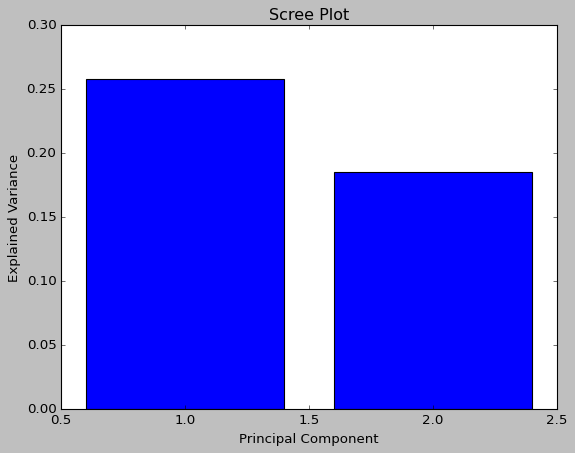

In [86]:
#Scree plot
plt.bar(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_)
#plt.plot(np.cumsum(pca.explained_variance_), pca.explained_variance_ + 1, c='red', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

The scree plot implies that PC1 captured 84% of the explained variance while PC2 60% of it.

### PCA scores

How much of our data is distributed around the principal components? We will find out using a hexbin. I used a hexbin and not a scattterplot because a hexbin can spot more individual data points better in a tightly clustered data than a scatterplot. We will use quality as our criterion to indicate where other qualities can be found in the chart.

We will also overlat a biplot to show the correlation of the principal components of all the features against each other.

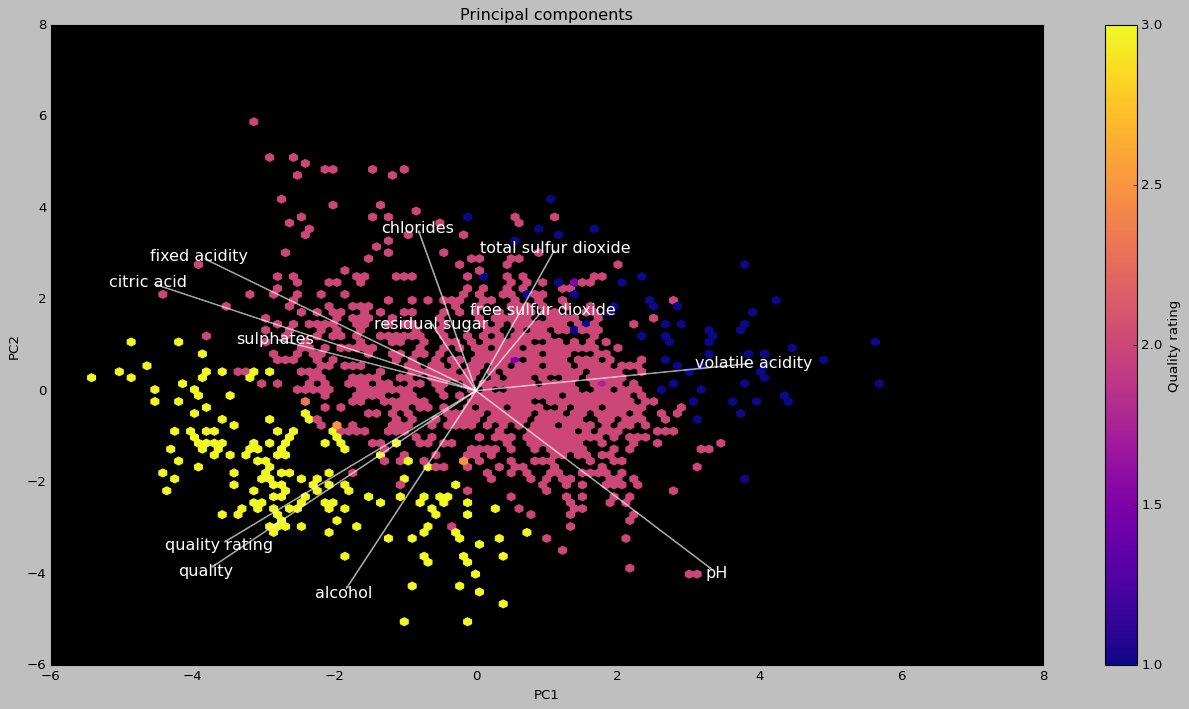

In [87]:
#draw figure and subplot
fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use('classic')

#draw hexbin
plt.hexbin(df_pca['PC1'], df_pca['PC2'], C=df_wine_extract['quality rating'], gridsize=100, cmap='plasma')

ax.set_facecolor('black')
ax.grid(False)

#biplot
for i, feature in enumerate(df_wine_extract.columns.values):
  ax.arrow(0, 0, pca.components_[0, i]*10, pca.components_[1, i]*10, width=0.01, color='white', alpha=0.5)
  ax.text(pca.components_[0, i]*10.3, pca.components_[1, i]*10.3, feature, fontsize='large', ha='center', va='center', color='white')

plt.xlim(-6, 8)
plt.ylim(-6, 8)
plt.title("Principal components")
plt.colorbar(label="Quality rating")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Hexbin inference
We have a well defined PCA plot that shows us that
* poor quality wine mainly have high PC2 values but average PC1 values
* moderate wine mainly have low PC1 and PC2 values that are skewed more to higher values
* high quality wine have low PC1 and PC2 values

### Biplot inference
If we are going to have better wine quality
* We need less sulphur dioxide, and more alcohol.
* We may also need less volatile acidity, but that may increase the citric acid


---





### Loadings
We now display the loadings of our PCA scores

In [88]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_wine_extract.columns.values)
df_loadings

,PC1,PC2
fixed acidity,-0.667991,0.426350
volatile acidity,0.669650,0.087105
citric acid,-0.791470,0.344561
residual sugar,-0.107141,0.212373
chlorides,-0.140948,0.515551
free sulfur dioxide,0.161931,0.256553
total sulfur dioxide,0.192011,0.451689
pH,0.579873,-0.576589
sulphates,-0.484310,0.164006
alcohol,-0.319220,-0.639464


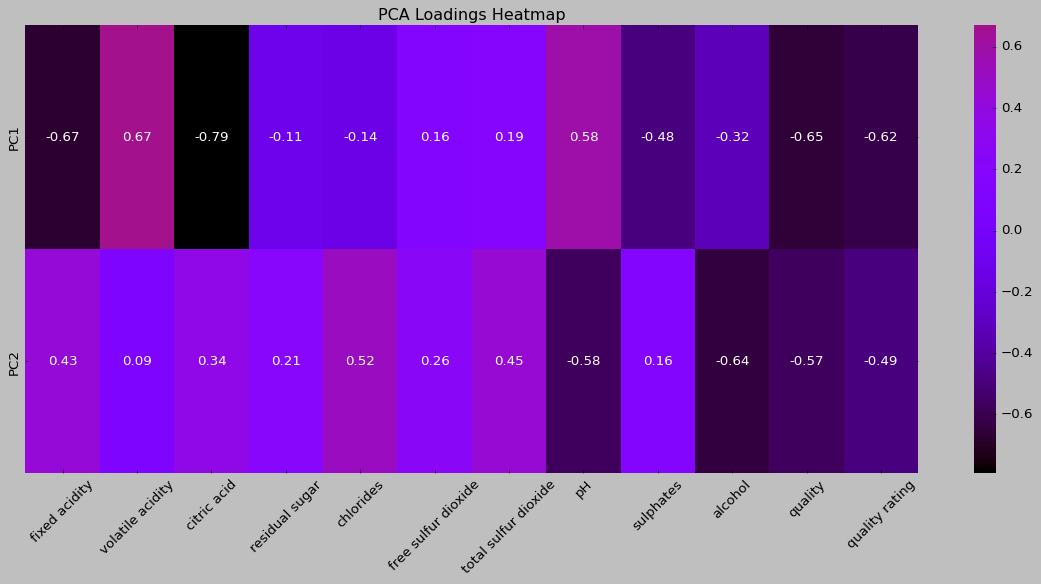

In [89]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(loadings.T, cmap='gnuplot', annot=True, fmt='.2f', xticklabels=df_wine_extract.columns, yticklabels=df_loadings.columns, center=1.0) #cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df_wine_extract.columns.values, yticklabels=['PC1', 'PC2', 'PC3'])
ax.set_title('PCA Loadings Heatmap')
plt.xticks(rotation=45)
plt.show()

<ipython-input-90-01fe7f60671a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


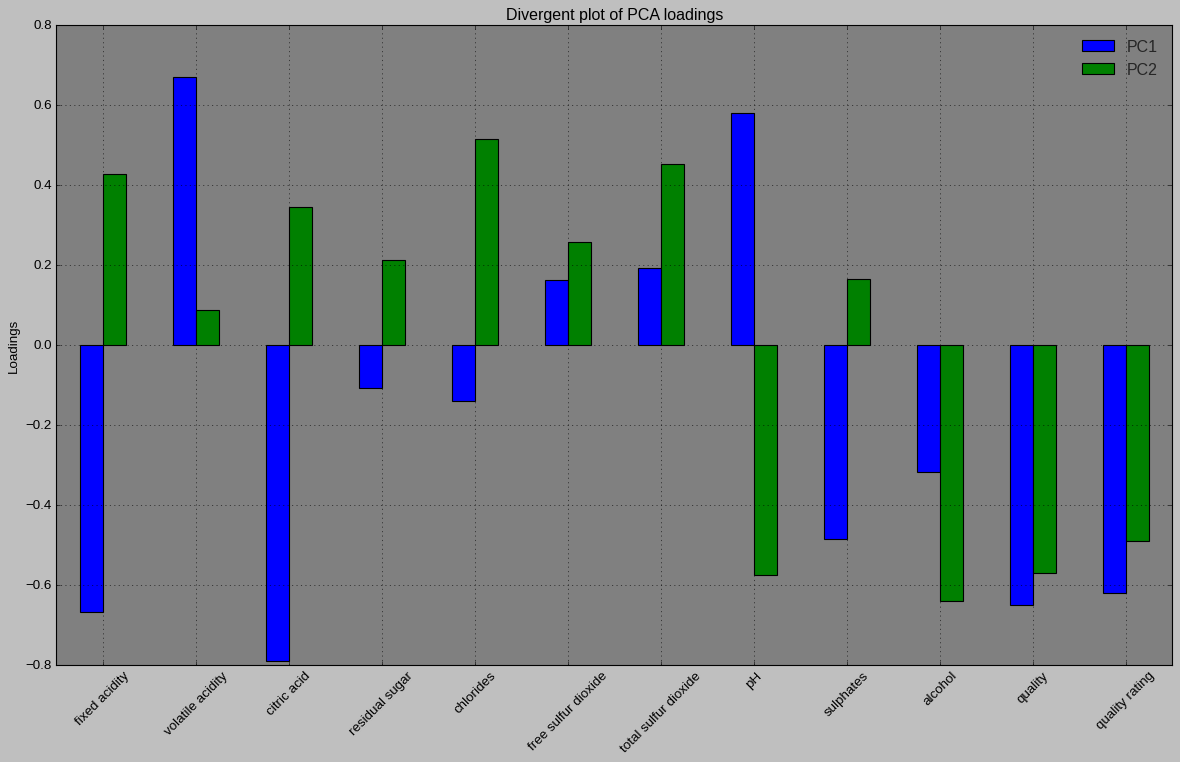

In [90]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.style.use('seaborn-whitegrid')
df_loadings.plot(kind='bar', ax=ax);
ax.set_facecolor('grey')
ax.grid(True)
plt.xticks(rotation=45)
plt.ylabel("Loadings")
plt.title("Divergent plot of PCA loadings")
plt.show()

# t-SNE
Let us try another dimensionality reduction to see what it produces, this time a non-linear probabilistic one 

In [91]:
#copy , set index, and sort dataset
df_wine_extract = df_wine.copy().set_index('index').sort_values('quality')

#to prevent future possible errors
df_wine_extract['quality'] = df_wine_extract['quality'].astype(float)

In [92]:
#Stabdardise
df_wine_tsne = StandardScaler().fit_transform(df_wine_extract)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', random_state=42)
wine_tsne = tsne.fit_transform(df_wine_tsne)
pdist = pairwise_distances(wine_tsne)
print(wine_tsne.shape)
df_tsne = pd.DataFrame(data=wine_tsne, columns=["T-SNE 1", "T-SNE 2"])
df_tsne.head()

(1599, 2)


,T-SNE 1,T-SNE 2
0,62.578426,-10.432321
1,6.117092,23.785221
2,61.300537,-9.799864
3,56.925678,-7.707496
4,63.685570,1.931629


In [93]:
# Print evaluation metrics
print(f'Perplexity: {tsne.get_params()["perplexity"]}')
print(f"Learning rate: {tsne.learning_rate_}")
print(f'KL divergence: {tsne.kl_divergence_}')
print(f"Number of features seen: {tsne.n_features_in_}")

Perplexity: 30
Learning rate: 50.0
KL divergence: 0.9450403451919556
Number of features seen: 12


Text(0.5, 1.0, 'T-SNE embeddings for red wine')

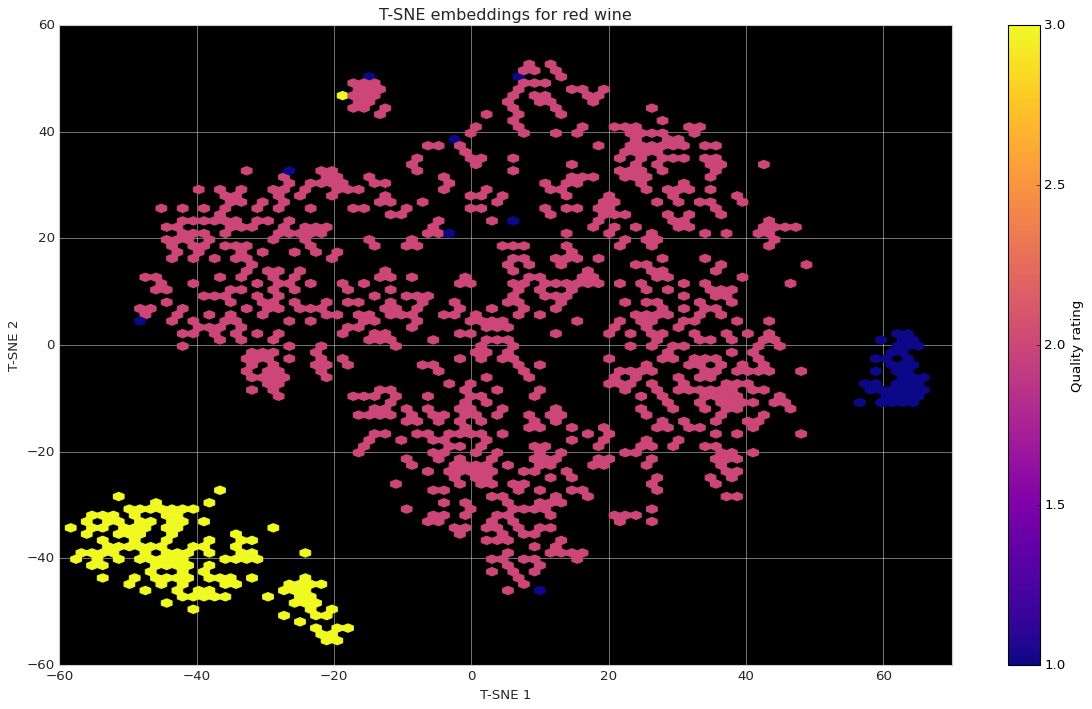

In [94]:
#draw figure and subplot
fig, ax = plt.subplots(figsize=(18, 10))
plt.style.use('classic')
ax.set_facecolor("black")

plt.hexbin(df_tsne["T-SNE 1"], df_tsne["T-SNE 2"], C=df_wine_extract['quality rating'], gridsize=80, cmap='plasma')

plt.xlim(-60, 70)
plt.ylim(-60, 60)
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
plt.colorbar(label="Quality rating")
plt.title("T-SNE embeddings for red wine")

We notice well that it has the same look as the PCA plot but with far better clarity when splitting the data
* Low quality wine make up around the 60 point mark and 0 point mark of T-SNE 1 and 2 respectively.
* Average wine dominates most of the positive side of both T-SNE dimensions
* The best wine has very low T-SNE values

Now let us look at both plots side by side

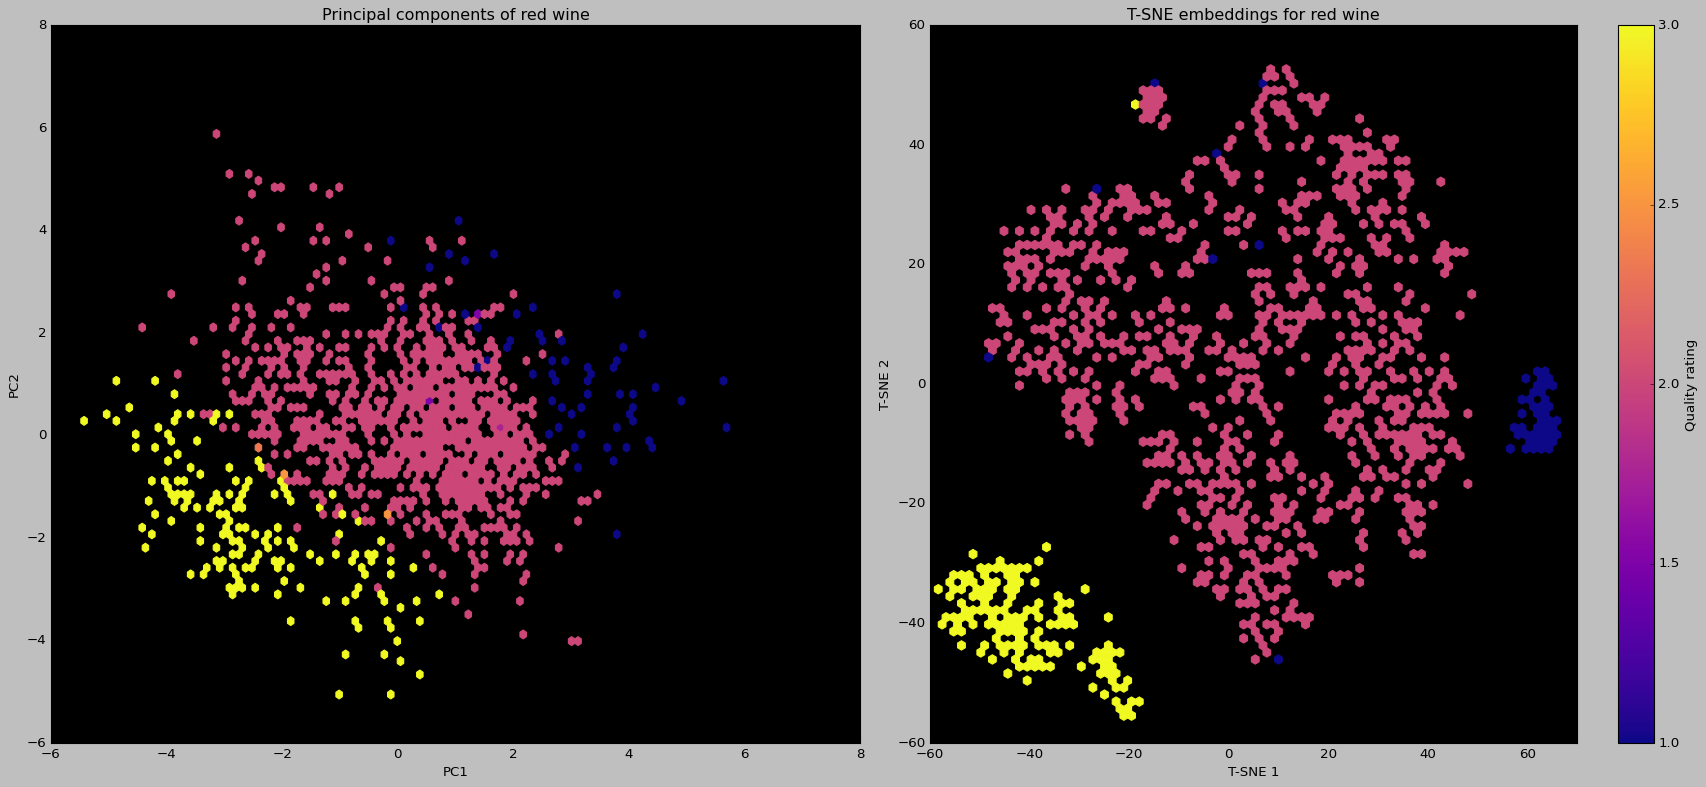

In [95]:
#PCA PLOT
fig, ax = plt.subplots(1, 2, figsize=(22, 10))

ax[0].hexbin(df_pca['PC1'], df_pca['PC2'], C=df_wine_extract['quality rating'], gridsize=100, cmap='plasma')
ax[0].set_facecolor('black')
ax[0].set_xlim(-6, 8)
ax[0].set_ylim(-6, 8)
ax[0].set_title("Principal components of red wine")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

#t-SNE PLOT
ax1 = ax[1].hexbin(df_tsne["T-SNE 1"], df_tsne["T-SNE 2"], C=df_wine_extract['quality rating'], gridsize=80, cmap='plasma')
ax[1].set_facecolor("black")
ax[1].set_xlim(-60, 70)
ax[1].set_ylim(-60, 60)
ax[1].set_xlabel("T-SNE 1")
ax[1].set_ylabel("T-SNE 2")
ax[1].set_title("T-SNE embeddings for red wine")
plt.tight_layout()
plt.colorbar(ax1, label="Quality rating", ax=ax[1], location='right')
plt.show()

In [33]:
# df_wine = df_wine.drop(df_wine.loc[df_wine.quality == 5].sample(n=350).index)
# df_wine = df_wine.drop(df_wine.loc[df_wine.quality == 6].sample(n=350).index)